In [1]:
import os

from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
DATA = 'data'
FILE = 'New_10 years_csv_v2.csv'

data = pd.read_csv(os.path.join(DATA, FILE), header=1)
data.head()

,Identifier (RIC),Company Name,Unnamed: 2,Unnamed: 3,Revenue (INR) In the last 15 FY,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 851,Unnamed: 852,Unnamed: 853,Unnamed: 854,Unnamed: 855,Unnamed: 856,Unnamed: 857,Unnamed: 858,Loss in past 2 years,Negative owners equity
0,NaN,NaN,Date of Insolvency,Score,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,...,FY-7,FY-8,FY-9,FY-10,FY-11,FY-12,FY-13,FY-14,NaN,NaN
1,ADME.NS,Adhunik Metaliks Ltd,08-07-2019,1,"74,042.20","1,22,114.50","72,320.50","1,10,829.90","2,55,569.10","2,96,053.80",...,0,0,0,0,0,0,0,0,1.0,1.0
2,TATS.NS,Tata Steel BSL Ltd,26-07-2017,1,"20,89,160.40","17,40,442.80","15,02,730.20","13,12,406.80","10,64,577.10","9,67,583.30",...,0,0,0,0,0,0,0,0,0.0,0.0
3,SNTX.NS,Sintex Industries Ltd,18-09-2019,1,"3,25,695.00","2,87,268.00","1,92,132.00","94,086.00","7,00,661.00","5,84,262.00",...,0,0,0,0,0,0,0,0,0.0,0.0
4,VTL.NZ,Vital Ltd,13-06-2019,1,"16,101.40","15,846.00","16,130.10","15,843.50","24,850.60","31,703.10",...,0,0,0,0,0,0,0,0,0.0,0.0


In [3]:
# data['Company Name'].values

In [4]:
# data['Regression Score']

In [5]:
data.columns = [col.replace('\n', ' ') for col in data.columns ]

In [6]:
data.head()

,Identifier (RIC),Company Name,Unnamed: 2,Unnamed: 3,Revenue (INR) In the last 15 FY,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 851,Unnamed: 852,Unnamed: 853,Unnamed: 854,Unnamed: 855,Unnamed: 856,Unnamed: 857,Unnamed: 858,Loss in past 2 years,Negative owners equity
0,NaN,NaN,Date of Insolvency,Score,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,...,FY-7,FY-8,FY-9,FY-10,FY-11,FY-12,FY-13,FY-14,NaN,NaN
1,ADME.NS,Adhunik Metaliks Ltd,08-07-2019,1,"74,042.20","1,22,114.50","72,320.50","1,10,829.90","2,55,569.10","2,96,053.80",...,0,0,0,0,0,0,0,0,1.0,1.0
2,TATS.NS,Tata Steel BSL Ltd,26-07-2017,1,"20,89,160.40","17,40,442.80","15,02,730.20","13,12,406.80","10,64,577.10","9,67,583.30",...,0,0,0,0,0,0,0,0,0.0,0.0
3,SNTX.NS,Sintex Industries Ltd,18-09-2019,1,"3,25,695.00","2,87,268.00","1,92,132.00","94,086.00","7,00,661.00","5,84,262.00",...,0,0,0,0,0,0,0,0,0.0,0.0
4,VTL.NZ,Vital Ltd,13-06-2019,1,"16,101.40","15,846.00","16,130.10","15,843.50","24,850.60","31,703.10",...,0,0,0,0,0,0,0,0,0.0,0.0


In [7]:
rename_cols = {}
rename_cols['Unnamed: 2'] = 'Date of Insolvency'
rename_cols['Unnamed: 3'] = 'Score'

In [8]:
# data['Regression Score']
data.drop(1, inplace=True)
data.head()

,Identifier (RIC),Company Name,Unnamed: 2,Unnamed: 3,Revenue (INR) In the last 15 FY,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 851,Unnamed: 852,Unnamed: 853,Unnamed: 854,Unnamed: 855,Unnamed: 856,Unnamed: 857,Unnamed: 858,Loss in past 2 years,Negative owners equity
0,NaN,NaN,Date of Insolvency,Score,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,...,FY-7,FY-8,FY-9,FY-10,FY-11,FY-12,FY-13,FY-14,NaN,NaN
2,TATS.NS,Tata Steel BSL Ltd,26-07-2017,1,"20,89,160.40","17,40,442.80","15,02,730.20","13,12,406.80","10,64,577.10","9,67,583.30",...,0,0,0,0,0,0,0,0,0.0,0.0
3,SNTX.NS,Sintex Industries Ltd,18-09-2019,1,"3,25,695.00","2,87,268.00","1,92,132.00","94,086.00","7,00,661.00","5,84,262.00",...,0,0,0,0,0,0,0,0,0.0,0.0
4,VTL.NZ,Vital Ltd,13-06-2019,1,"16,101.40","15,846.00","16,130.10","15,843.50","24,850.60","31,703.10",...,0,0,0,0,0,0,0,0,0.0,0.0
5,IVRC.NS,IVRCL Ltd,08-11-2019,1,"1,25,262.90","1,90,446.20","2,59,748.10","2,99,642.00","3,81,953.90","4,94,470.30",...,0,0,0,0,0,0,0,0,1.0,1.0


In [9]:
columns = data.columns
cols = []
indexes = []
prev_col = []
prev_col_idx = []
for idx, col in enumerate(columns):
    if col.find('Unnamed') >= 0:
        cols.append(col)
        indexes.append(idx)
        prev_col.append(columns[idx - 1])
        prev_col_idx.append(idx - 1)
len(prev_col)

779

In [10]:
# prev_col

In [11]:
prev_column = None
for index,column in enumerate(cols):
    if prev_col[index].find('Unnamed') < 0:
        prev_column = prev_col[index]  
    rename_cols[column] = str(prev_column) + ' ' + str(data[column].iloc[0])

In [12]:
# rename_cols

In [13]:
data.rename(rename_cols, axis=1, inplace=True)

In [14]:
data.drop(0, inplace=True)
data.head()

,Identifier (RIC),Company Name,Company Name Date of Insolvency,Company Name Score,Revenue (INR) In the last 15 FY,Revenue (INR) In the last 15 FY FY-1,Revenue (INR) In the last 15 FY FY-2,Revenue (INR) In the last 15 FY FY-3,Revenue (INR) In the last 15 FY FY-4,Revenue (INR) In the last 15 FY FY-5,...,OCF/Debt FY-7,OCF/Debt FY-8,OCF/Debt FY-9,OCF/Debt FY-10,OCF/Debt FY-11,OCF/Debt FY-12,OCF/Debt FY-13,OCF/Debt FY-14,Loss in past 2 years,Negative owners equity
2,TATS.NS,Tata Steel BSL Ltd,26-07-2017,1,"20,89,160.40","17,40,442.80","15,02,730.20","13,12,406.80","10,64,577.10","9,67,583.30",...,0,0,0,0,0,0,0,0,0.0,0.0
3,SNTX.NS,Sintex Industries Ltd,18-09-2019,1,"3,25,695.00","2,87,268.00","1,92,132.00","94,086.00","7,00,661.00","5,84,262.00",...,0,0,0,0,0,0,0,0,0.0,0.0
4,VTL.NZ,Vital Ltd,13-06-2019,1,"16,101.40","15,846.00","16,130.10","15,843.50","24,850.60","31,703.10",...,0,0,0,0,0,0,0,0,0.0,0.0
5,IVRC.NS,IVRCL Ltd,08-11-2019,1,"1,25,262.90","1,90,446.20","2,59,748.10","2,99,642.00","3,81,953.90","4,94,470.30",...,0,0,0,0,0,0,0,0,1.0,1.0
6,BILT.NS,Ballarpur Industries Ltd,17-04-2019,1,"3,64,306.00","2,54,614.00","2,17,128.00","4,47,297.00","3,23,863.00","5,28,458.00",...,0,0,0,0,0,0,0,0,1.0,1.0


In [15]:
# data.to_csv('data/clean_data_v2.csv', index=False)

In [16]:
# data1 = pd.read_csv('data/clean_data.csv')
# data1.head()

In [17]:
# data = pd.read_csv('data/New_10 years_csv_v2.csv')
# data.head()

## EDA

Add company name below to see the `Revenue in INR` for the last 15 financial years.

In [93]:
COMPANY_NAME = "Tata Metaliks Ltd"

In [94]:
years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005]
len(years)

15

In [95]:
cols_of_interest = ['Total Current Assets', 'Company Market Cap', 'Total Debt', 'Total Equity',
                    'Total Short Term Borrowings', "Total Liabilities And Shareholders' Equity",
                   "Total Current Liabilities", "Revenue", "Total Assets, Reported"]
revenue = None
plotting_data = {}

revenue_cols = []
for col in data.columns:
    for int_col in cols_of_interest:
        if col.find(int_col) >= 0:
            revenue_cols.append(col)
            
grouped = data.groupby('Company Name')
for name, group in grouped:
    if name == COMPANY_NAME:
        for int_col in cols_of_interest:
            data_int = []
            for rev_col in revenue_cols:
                if rev_col.find(int_col) >= 0:
                    col_data = group[rev_col].astype(str).str.replace(",", "").replace(' -   ', str(0)).str.replace("%", "").astype(float).values / 1000000
                    data_int.append(col_data[0])
            plotting_data[int_col] = data_int[0:15]
            

print(plotting_data)            

{'Total Current Assets': [0.0681454, 0.049345400000000005, 0.0422775, 0.036437300000000006, 0.0283133, 0.027888, 0.035491, 0.0349412, 0.039943, 0.0373514, 0.0265263, 0.033831599999999996, 0.0185092, 0.0161291, 0.009329299999999999], 'Company Market Cap': [0.15684879999999998, 0.2236015, 0.08212280000000001, 0.025642, 0.036768800000000004, 0.0140475, 0.0158303, 0.0132003, 0.0326215, 0.0370469, 0.0196867, 0.0529784, 0.0278294, 0.0323054, 0.0438367], 'Total Debt': [0.004218899999999999, 0.0475284, 0.0539648, 0.041007199999999994, 0.0378538, 0.0265483, 0.0435228, 0.05928, 0.0470939, 0.0349393, 0.048739, 0.011142899999999999, 0.0115, 0.0095, 0.002], 'Total Equity': [0.0767076, 0.035868199999999996, 0.0207179, 0.0099041, -0.0012046, -0.0019762, -0.0029235999999999997, 0.0057873, 0.0071348, 0.0070775, 0.0042204, 0.0191903, 0.0142458, 0.0130838, 0.0102224], 'Total Short Term Borrowings': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], "Total Liabilities And Shareho

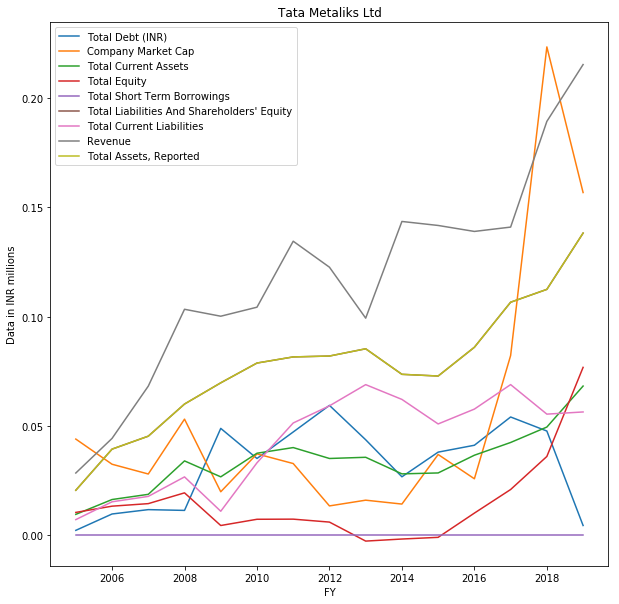

In [96]:
plt.figure(figsize=(10,10))
plt.title(COMPANY_NAME)
plt.plot(years,plotting_data['Total Debt'] , label='Total Debt (INR)')
plt.plot(years, plotting_data['Company Market Cap'], label='Company Market Cap ')
plt.plot(years, plotting_data['Total Current Assets'], label='Total Current Assets')
plt.plot(years, plotting_data['Total Equity'], label='Total Equity')
plt.plot(years, plotting_data['Total Short Term Borrowings'], label='Total Short Term Borrowings')
plt.plot(years, plotting_data["Total Liabilities And Shareholders' Equity"], label="Total Liabilities And Shareholders' Equity")
plt.plot(years, plotting_data['Total Current Liabilities'], label='Total Current Liabilities')
plt.plot(years, plotting_data['Revenue'], label='Revenue')
plt.plot(years, plotting_data['Total Assets, Reported'], label='Total Assets, Reported')
plt.legend()
plt.xlabel('FY')
plt.ylabel('Data in INR millions')
plt.show()

In [97]:
# cols_of_interest = 'Total Debt'
# revenue_cols = []
# for col in data.columns:
#     if col.find(cols_of_interest) >= 0:
#         revenue_cols.append(col)
# grouped = data.groupby('Company Name')
# for name, group in grouped:
#     if name == COMPANY_NAME:
#         revenue = group[revenue_cols]

# revenue = revenue[revenue_cols].values / 1000000000
# revenue = revenue.tolist()
# # revenue[0]

# plt.figure(figsize=(10,10))
# plt.plot(range(len(revenue_cols)), revenue[0])
# plt.xlabel('FY')
# plt.ylabel(cols_of_interest)
# plt.show()

In [98]:
# cols_of_interest = ['Total Debt']
# revenue_cols = []
# for col in data.columns:
#     for int_col in cols_of_interest:
#         if col.find(int_col) >= 0:
#             revenue_cols.append(col)

            
# plt.figure(figsize=(10,10))
# plt.title('Distribution of Total Current Assets in Billion')
# plt.hist(data[revenue_cols].values / 1000000000, bins=2, density=True)
# plt.xlabel('Amount')
# plt.ylabel('Count')
# plt.show()

In [99]:
data_slice = pd.DataFrame.from_dict(plotting_data)
data_slice.drop('Total Short Term Borrowings', axis=1, inplace=True)
data_slice

,Total Current Assets,Company Market Cap,Total Debt,Total Equity,Total Liabilities And Shareholders' Equity,Total Current Liabilities,Revenue,"Total Assets, Reported"
0,0.068145,0.156849,0.004219,0.076708,0.138249,0.056270,0.215511,0.138249
1,0.049345,0.223602,0.047528,0.035868,0.112459,0.055274,0.189458,0.112459
2,0.042278,0.082123,0.053965,0.020718,0.106570,0.068809,0.141010,0.106570
3,0.036437,0.025642,0.041007,0.009904,0.085922,0.057579,0.139018,0.085922
4,0.028313,0.036769,0.037854,-0.001205,0.072740,0.050774,0.141756,0.072740
5,0.027888,0.014047,0.026548,-0.001976,0.073521,0.062019,0.143590,0.073521
6,0.035491,0.015830,0.043523,-0.002924,0.085226,0.068793,0.099269,0.085226
7,0.034941,0.013200,0.059280,0.005787,0.081902,0.059070,0.122623,0.081902
8,0.039943,0.032621,0.047094,0.007135,0.081500,0.051216,0.134535,0.081500
9,0.037351,0.037047,0.034939,0.007077,0.078693,0.032968,0.104291,0.078693


In [100]:
data_slice.corr(method='spearman')

,Total Current Assets,Company Market Cap,Total Debt,Total Equity,Total Liabilities And Shareholders' Equity,Total Current Liabilities,Revenue,"Total Assets, Reported"
Total Current Assets,1.000000,0.453571,0.389286,0.353571,0.921429,0.621429,0.721429,0.921429
Company Market Cap,0.453571,1.000000,-0.271429,0.782143,0.225000,-0.157143,0.300000,0.225000
Total Debt,0.389286,-0.271429,1.000000,-0.264286,0.485714,0.489286,0.267857,0.485714
Total Equity,0.353571,0.782143,-0.264286,1.000000,0.214286,-0.132143,0.175000,0.214286
Total Liabilities And Shareholders' Equity,0.921429,0.225000,0.485714,0.214286,1.000000,0.782143,0.753571,1.000000
Total Current Liabilities,0.621429,-0.157143,0.489286,-0.132143,0.782143,1.000000,0.603571,0.782143
Revenue,0.721429,0.300000,0.267857,0.175000,0.753571,0.603571,1.000000,0.753571
"Total Assets, Reported",0.921429,0.225000,0.485714,0.214286,1.000000,0.782143,0.753571,1.000000


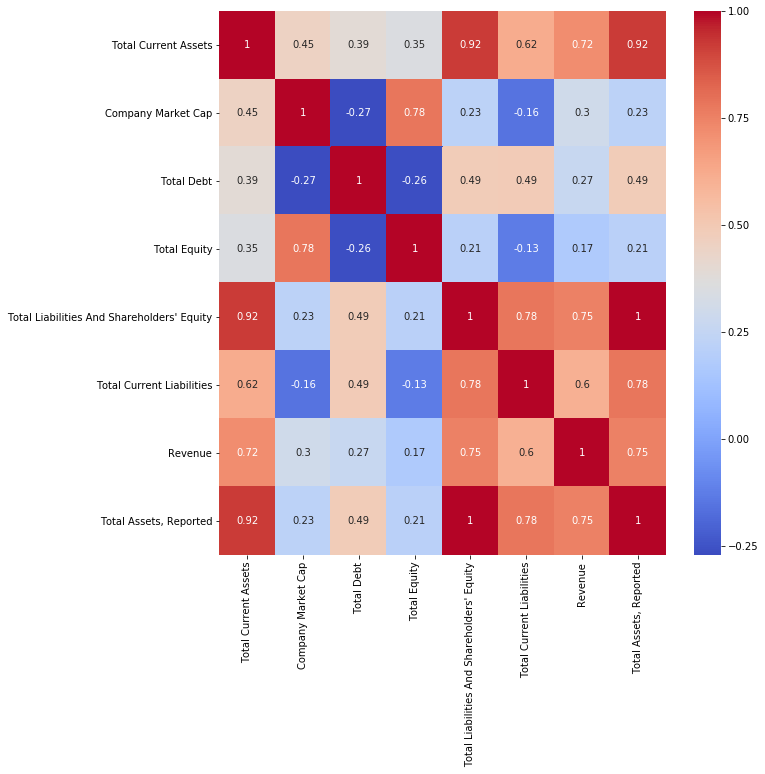

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(data_slice.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

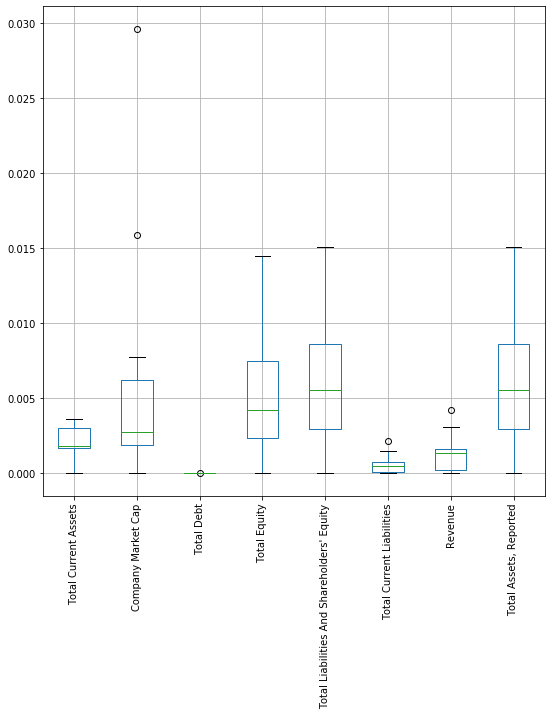

In [27]:
plt.figure(figsize=(9,9))
data_slice.boxplot(column=['Total Current Assets', 'Company Market Cap', 'Total Debt', 'Total Equity',
                           "Total Liabilities And Shareholders' Equity", 'Total Current Liabilities',
                           'Revenue', 'Total Assets, Reported'], rot=90)
plt.show()

<Figure size 648x648 with 0 Axes>

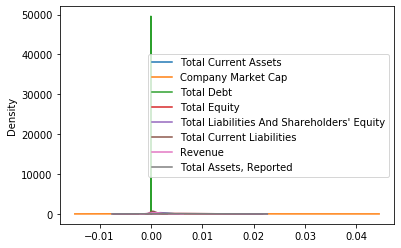

In [28]:
plt.figure(figsize=(9,9))
data_slice.plot.kde()
plt.show()

## Z-Score Model

In [29]:
df = pd.read_excel('data/clean_pirimid.xlsx')
df.head()

,Identifier (RIC),Company Name,Unnamed: 2,Unnamed: 3,Current ratio,Expanded current ratio,cost of debt,debt to equity ratio,Expense ratio,Amplified expense index,...,Receivables conversion ratio,Return on equity,Revenue variation,Treasure to revenue ratio,Common size ratio for working capital needs,Working capital needs to revenue ratio,Operating cash ﬂow to debt ratio,2 years of losses,Net income to asset,Negative owner’s equity(Please check)
0,NaN,NaN,Date of Insolvency,Score,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.221124,-0.533710,-0.000387,1.0,NaN,1.0
1,ADME.NS,Adhunik Metaliks Ltd,2019-07-08 00:00:00,1,0.769703,0.254362,0.069897,-5.569229,0.070858,0.105110,...,107.124800,NaN,75182.656571,NaN,-0.450087,-1.455212,0.012658,0.0,NaN,0.0
2,TATS.NS,Tata Steel BSL Ltd,2017-07-26 00:00:00,1,0.532034,0.145713,0.120682,-0.706343,0.123370,0.177613,...,29.252583,NaN,394002.445818,NaN,0.066685,0.533547,0.099081,0.0,NaN,0.0
3,SNTX.NS,Sintex Industries Ltd,2019-09-18 00:00:00,1,1.432468,0.447701,0.017004,1.157371,0.092152,0.097102,...,252.819157,NaN,230972.925685,NaN,-0.043558,-0.081001,0.000000,0.0,NaN,0.0
4,VTL.NZ,Vital Ltd,2019-06-13 00:00:00,1,0.792211,0.271351,0.071073,1.028388,0.340825,0.358584,...,53.026743,NaN,3969.276574,NaN,-0.389427,-2.767064,-0.006330,1.0,NaN,1.0


In [30]:
df.rename({'Unnamed: 2' : 'Date of Insolvency', 'Unnamed: 3' : 'Score'}, axis=1, inplace=True)
df.drop(0,inplace=True)

In [31]:
df.head()

,Identifier (RIC),Company Name,Date of Insolvency,Score,Current ratio,Expanded current ratio,cost of debt,debt to equity ratio,Expense ratio,Amplified expense index,...,Receivables conversion ratio,Return on equity,Revenue variation,Treasure to revenue ratio,Common size ratio for working capital needs,Working capital needs to revenue ratio,Operating cash ﬂow to debt ratio,2 years of losses,Net income to asset,Negative owner’s equity(Please check)
1,ADME.NS,Adhunik Metaliks Ltd,2019-07-08 00:00:00,1,0.769703,0.254362,0.069897,-5.569229,0.070858,0.105110,...,107.124800,NaN,75182.656571,NaN,-0.450087,-1.455212,0.012658,0.0,NaN,0.0
2,TATS.NS,Tata Steel BSL Ltd,2017-07-26 00:00:00,1,0.532034,0.145713,0.120682,-0.706343,0.123370,0.177613,...,29.252583,NaN,394002.445818,NaN,0.066685,0.533547,0.099081,0.0,NaN,0.0
3,SNTX.NS,Sintex Industries Ltd,2019-09-18 00:00:00,1,1.432468,0.447701,0.017004,1.157371,0.092152,0.097102,...,252.819157,NaN,230972.925685,NaN,-0.043558,-0.081001,0.000000,0.0,NaN,0.0
4,VTL.NZ,Vital Ltd,2019-06-13 00:00:00,1,0.792211,0.271351,0.071073,1.028388,0.340825,0.358584,...,53.026743,NaN,3969.276574,NaN,-0.389427,-2.767064,-0.006330,1.0,NaN,1.0
5,IVRC.NS,IVRCL Ltd,2019-11-08 00:00:00,1,0.561780,0.363716,0.053673,-12.013411,0.161147,0.277511,...,249.693305,NaN,98827.176018,NaN,-0.303988,-1.303538,0.000000,1.0,NaN,1.0


In [32]:
df.columns

Index(['Identifier (RIC)', 'Company Name', 'Date of Insolvency', 'Score',
       'Current ratio', 'Expanded current ratio', 'cost of debt',
       'debt to equity ratio', 'Expense ratio', 'Amplified expense index',
       'Administration expenses to revenue ratio',
       'Commercial expense to revenue ratio', 'Financial leverage',
       'Liability structure', 'Common size ratio for long-term assets',
       'Net income variation( 5 years)', 'Operating income to asset ratio',
       'Operating leverage', 'Payable conversion ratio',
       'Operating return on assets', 'Receivables conversion ratio',
       'Return on equity', 'Revenue variation', 'Treasure to revenue ratio',
       'Common size ratio for working capital needs',
       'Working capital needs to revenue ratio',
       'Operating cash ﬂow to debt ratio', '2 years of losses',
       'Net income to asset', 'Negative owner’s equity(Please check)'],
      dtype='object')

Total current assets, Total Liabilities, total workng capital, Net Income Before Taxes, Total Equity, Accounts Receivable - Trade